# Theoretical Background

Recall that: the motion of a pendulum undergoing simple harmonic motion could be described by the following set of first-order differential equations:

$$ \frac{d\omega}{dt} = -\frac{g}{l}\theta $$
$$ \frac{d\theta}{dt} = \omega $$

Where:

$\theta$: The angle the pendulum makes with the normal of the surface, from which it hangs.

$\omega$: The angular velocity of the pendulum.

The motion of a **non-linear pendulum** is different to a simple pendulum, since it includes the effect of friction (mostly air friction) $q$ and a sinusoidal driving force $F_{D}.sin(\Omega_{D}.t)$. 

Where: $\Omega_D$, refers to the angular frequency of this driving force.

**Note that**: The driving force, should be thought of as the inherent causal force of the motion of the pendulum and not the "force" it would exert on a colliding object. 

Therefore, the **non-linear pendulum** can be described by the following set of first-order differential equations:

$$ \frac{d\omega}{dt} = -\frac{g}{l}.sin(\theta) -q.\frac{d\theta}{dt} + F_{D}.sin(\Omega_{D}.t)$$
$$ \frac{d\theta}{dt} = \omega $$


According to the Euler-Cromer method, the values of $\omega_{i+1}$ and $\theta_{i+1}$ can be approximated as:

$$\omega_{i+1} = \omega_{i} - \frac{g}{l}.sin(\theta_i).\Delta t - q\omega_i.\Delta t + F_D.sin(\Omega_D. t_i).\Delta t$$
$$\theta_{i+1} = \theta_{i} + \omega_{i+1}.\Delta t$$

Where:

$\omega_{i}$ = $\omega(t_i)$

$\theta{i}$ = $\theta(t_i)$

and $t_{i} = t_{0} + i.\Delta t$

# Method

Consider the following pseudo-code:

## Pseudo-code:

Let g = 9.8 be the gravitational acceleration constant.

Let q = 0.5 be the damping factor

Let Omega_d = 2.0/3.0 be the angular frequency of the driving force.

Let l = 1 be the length of the string.

Let t = [t0, t0+dt, ..., t_end]

Let N = length(t)

Let theta = theta0

Where: theta0 -> Starting angle

Let omega = omega0

Where: omega0 -> Starting angle

dt -> Time step

reset -> Boolean variable, if True, reset the values of theta to be within the range of [-pi, pi]

Now Calculate the numerical solutions using the Euler-Cromer method...

for i to N:
    
    append (omega[i] + ( -(g/l)sin(theta[i] -q.omega[i]) + (FD).sin(Omega_D.t[i])) *dt) -> omega
    
    append (theta[i] + omega[i]*dt) -->t theta
    
    if reset is True:
        if theta[i+1] < -pi
            theta[i+1] = theta[i+1] +2.pi
        if theta[i+1] > pi
            theta[i+1] = theta[i+1] -2.pi

# Code Implementation

## Import Libraries

To implement the code, first import all the necessary Python libraries.

In [1]:
import numpy as np # For scientific computing
import matplotlib.pyplot as plt # For data visualisation
import math # To use mathematical functions

In [2]:
def chaos_Pendulum(theta0, omega0, t_end, dt, FD, reset):
    
    '''
    Parameters:
    -----------
    
    theta0: Initial angle
    omega0: Initial angular velocity
    t_end: Time duration
    dt: Time-step
    FD: Driving force
    reset: (Boolean), 
        If True; the algorithm will add or substract 2π to keep the values
        of θ within the range of [-π, π]
    '''
    
    # Gravitational acceleration constant
    g = 9.8
    
    # Damping factor
    q = 0.5 
    # Angular frequency of the driving force (Assumed to be sinusoidal)
    Omega_D = 2.0/3.0 
    
    # Length of the string holding the weight
    l = g 
    
    # Amount of steps
    N = int((t_end)/dt) 
    
    # Time Array
    t = np.linspace(0, t_end, N+1)
    
    # Array for angles
    theta = [theta0]
    
    # Array for angular velocities
    omega = [omega0]
    
    # -----------------------------------------------
    # Calculate the numerical solution (Euler-Cromer Method)
    # -----------------------------------------------
    for i in range(0, N):
        
        omega = np.append(omega, omega[i] + ( -(g/l)*math.sin(theta[i]) -q*omega[i] + (FD) * math.sin(Omega_D * t[i])) * dt)
        theta = np.append(theta, theta[i] + ( omega[i+1] * dt) )
        
        if reset is True:
            if theta[i+1] < -math.pi:
                theta[i+1] = theta[i+1] + 2 * math.pi
            if theta[i+1] > math.pi:
                theta[i+1] = theta[i+1] - 2 * math.pi
    
    return t, theta, omega

## Reproducing Figure 3.6

### Set Arrays

In [3]:
# Driving Force = 0
t1, theta1, omega1 = chaos_Pendulum(0.2, 0, 60, 0.04, 0, False)

# Driving Force = 0.5
t2, theta2, omega2 = chaos_Pendulum(0.2, 0, 60, 0.04, 0.5, False)

# Driving Force = 1.2 (With resets)
t3, theta3, omega3 = chaos_Pendulum(0.2, 0, 60, 0.04, 1.2, True)

# Driving Force = 1.2 (No resets)
tNR, thetaNR, omegaNR = chaos_Pendulum(0.2, 0, 60, 0.04, 1.2, False)

## Plot Graphs

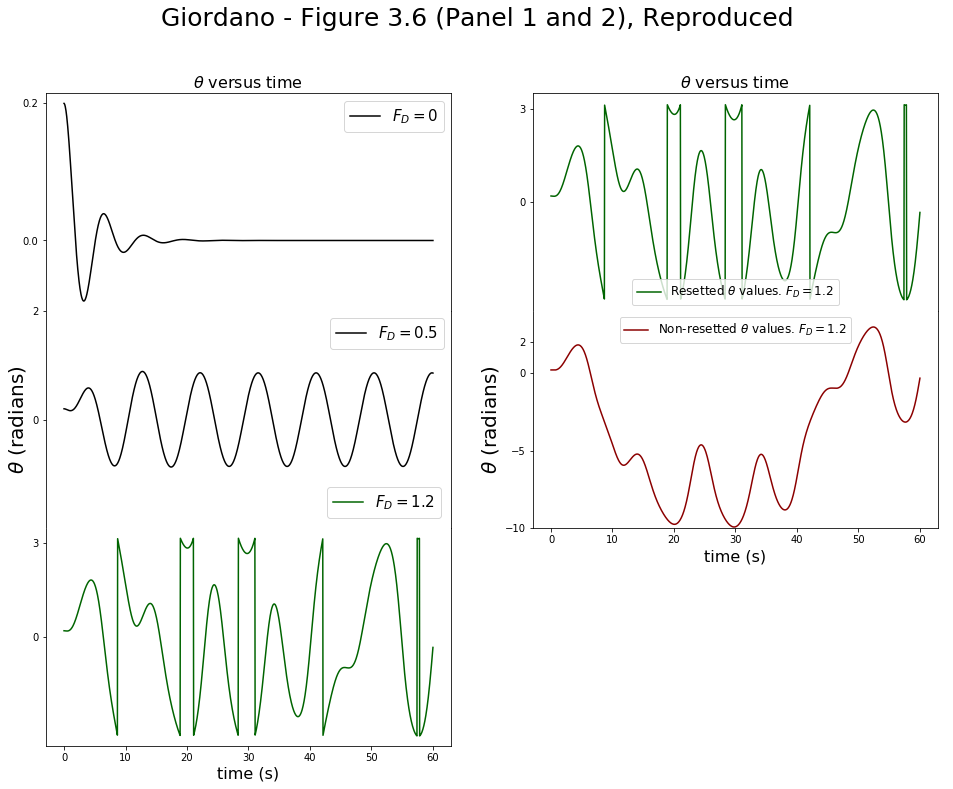

In [4]:
# Create figure
fig, [(ax1, ax4), (ax2, ax5), (ax3, ax6)] = plt.subplots(3,2,figsize = [16,12])

# --------
# 1st Panel
# --------

# Set Title and Axes Names
ax1.set_title(r'$\theta$ versus time', fontsize = 16)
ax3.set_xlabel('time (s)', fontsize = 16)
ax2.set_ylabel(r'$\theta$ (radians)', fontsize = 20)

# Customise Axes
ax1.set_yticks(ticks=[0, 0.2])
ax1.set_xticks(ticks=[])
ax2.set_ylim([-2,2])
ax2.set_xticks(ticks=[])
ax2.set_yticks(ticks=[0, 2])
ax3.set_yticks(ticks=[0, 3])
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)


# Plot
ax1.plot(t1, theta1, color = 'black', linestyle = '-', label = r'$F_D = 0$')
ax2.plot(t2, theta2, color = 'black', linestyle = '-', label = r'$F_D = 0.5$')
ax3.plot(t3, theta3, color = 'darkgreen', linestyle = '-', label = r'$F_D = 1.2$')

# --------
# 2nd Panel
# --------

# Set Title and Axes Names
ax4.set_title(r'$\theta$ versus time', fontsize = 16)
ax5.set_xlabel('time (s)', fontsize = 16)
ax5.set_ylabel(r'$\theta$ (radians)', fontsize = 20)

# Customise Axes
ax4.set_ylim([-3.5,3.5])
ax4.set_yticks(ticks=[0, 3])
ax5.set_ylim([-10,4])
ax5.set_yticks(ticks=[-10, -5, 0, 2])
ax6.axis('off')

ax4.spines['bottom'].set_visible(False)
ax5.spines['top'].set_visible(False)

# Plot
ax4.plot(t3, theta3, color = 'darkgreen', linestyle = '-', label = r'Resetted $\theta$ values. $F_{D}=1.2$')
ax5.plot(tNR, thetaNR, color = 'darkred', linestyle = '-', label = r'Non-resetted $\theta$ values. $F_{D}=1.2$')

# Set Titles, and axes names
fig.suptitle("Giordano - Figure 3.6 (Panel 1 and 2), Reproduced", fontsize = 25)

plt.subplots_adjust(wspace=0.2, hspace=0)

ax1.legend(loc = 'upper right', fontsize = 15)
ax2.legend(loc = 'upper right', fontsize = 15)
ax3.legend(bbox_to_anchor=(62.5, 5), bbox_transform=ax3.transData, fontsize = 15)
ax4.legend(loc = 'lower center', fontsize = 12)
ax5.legend(loc = 'upper center', fontsize = 12)
plt.show()

## Reproducing Figure 3.7

### Set Arrays

In [5]:
# Driving Force = 0.5 (Left Graph)
tL, thetaL, omegaL = chaos_Pendulum(0.2, 0, 50, 0.04, 0.5, False)
tL_Alt, thetaL_Alt, omegaL_Alt = chaos_Pendulum(0.2 + 0.001, 0, 50, 0.04, 0.5, False)

# Driving Force = 1.2 (Right Graph)
tR, thetaR, omegaR = chaos_Pendulum(0.2, 0, 150, 0.04, 1.2, False)
tR_Alt, thetaR_Alt, omegaR_Alt = chaos_Pendulum(0.2 + 0.001, 0, 150, 0.04, 1.2, False)

### Plot Graphs

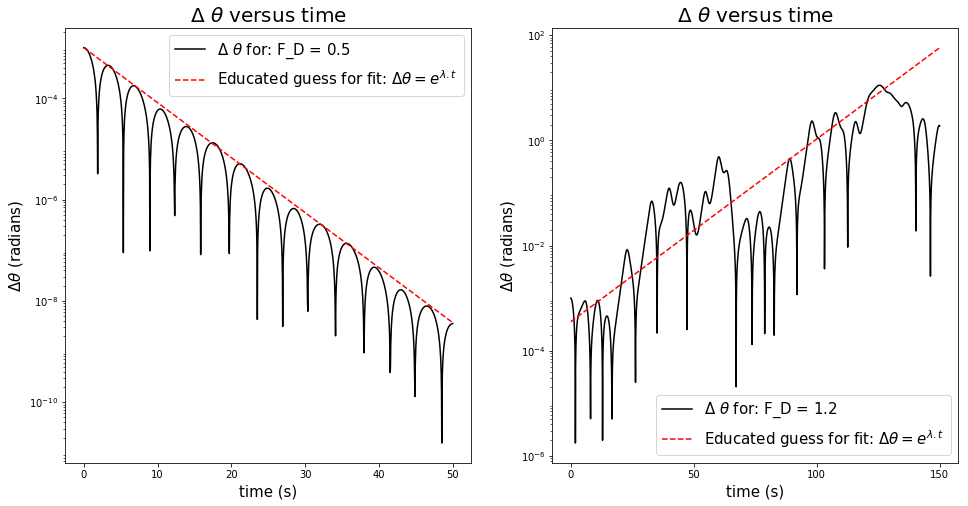

In [6]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [16,8])

# --------
# Left
# --------

ax1.set_yscale('log') # Set scale to logarithmic
ax1.set_yticks(ticks = [1e-10, 1e-8, 1e-6, 1e-4, 0.01]) # Set Axis Ticks
D_Theta_L = abs(thetaL_Alt - thetaL) # Calculate Δθ
l_L = -0.25 # Guess the value for λ

# Set Labels and Title
ax1.set_title(r'$\Delta$ $\theta$ versus time', fontsize = 20)
ax1.set_xlabel('time (s)', fontsize = 15)
ax1.set_ylabel(r'$\Delta \theta$ (radians)', fontsize = 15)

# Plot
ax1.plot(tL_Alt, D_Theta_L, color = 'black', linestyle = '-', label = r'$\Delta$ $\theta$ for: F_D = 0.5')
ax1.plot(tL_Alt, np.max(D_Theta_L) * np.e ** (l_L*tL_Alt), color = 'red', linestyle = '--', label = r'Educated guess for fit: $\Delta \theta = e^{\lambda.t}$')

# --------
# Right
# --------

ax2.set_yscale('log') # Set scale to logarithmic
ax2.set_yticks(ticks = [1e-6, 1e-4, 1e-2, 1, 1e2]) # Set Axis Ticks
ax2.set_xticks([0, 50, 100, 150])
D_Theta_R = abs(thetaR_Alt - thetaR) # Calculate Δθ
l_R = 0.08 # Guess the value for λ

# Set Labels  and Title
ax2.set_title(r'$\Delta$ $\theta$ versus time', fontsize = 20)
ax2.set_xlabel('time (s)', fontsize = 15)
ax2.set_ylabel(r'$\Delta \theta$ (radians)', fontsize = 15)

# Plot
ax2.plot(tR_Alt, D_Theta_R, color = 'black', linestyle = '-', label = r'$\Delta$ $\theta$ for: F_D = 1.2')
ax2.plot(tR_Alt, D_Theta_R[180] * np.e ** (l_R*tR_Alt), color = 'red', linestyle = '--', label = r'Educated guess for fit: $\Delta \theta = e^{\lambda.t}$')

# Set Titles, and axes names
ax1.legend(loc = 'upper right', fontsize = 15)
ax2.legend(loc = 'lower right', fontsize = 15)
plt.show()

In [7]:
# Driving Force = 1.8 (Right Graph)
t_test, theta_test, omega_test = chaos_Pendulum(0.2, 0, 150, 0.04, 0.8, False)
t_test_Alt, theta_test_Alt, omega_test_Alt = chaos_Pendulum(0.2 + 0.001, 0, 150, 0.04, 0.8, False)

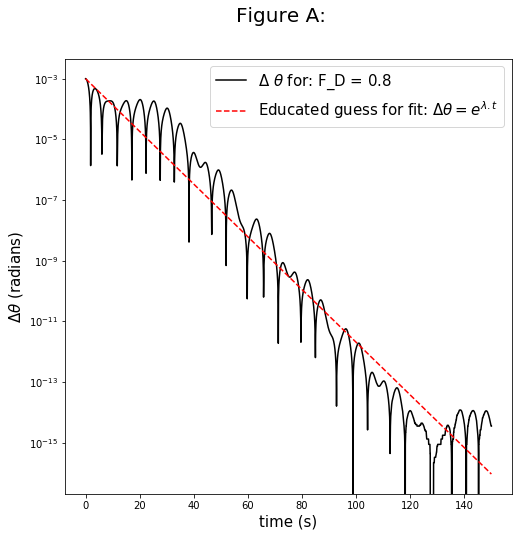

In [8]:
# Create figure
fig, ax = plt.subplots(figsize = [8,8])

plt.yscale('log') # Set scale to logarithmic

D_Theta_Test = abs(theta_test_Alt - theta_test) # Calculate Δθ
l_Test = -0.20 # Guess the value for λ

# Set Labels
plt.xlabel('time (s)', fontsize = 15)
plt.ylabel(r'$\Delta \theta$ (radians)', fontsize = 15)

# Plot
plt.plot(t_test, D_Theta_Test, color = 'black', linestyle = '-', label = r'$\Delta$ $\theta$ for: F_D = 0.8')
plt.plot(t_test, (D_Theta_Test[0]) * np.e ** (l_Test*t_test), color = 'red', linestyle = '--', label = r'Educated guess for fit: $\Delta \theta = e^{\lambda.t}$')

# Set Titles, and axes names
plt.legend(loc = 'upper right', fontsize = 15)
fig.suptitle(r'Figure A:', fontsize = 20, y = 0.97)
plt.show()